# GDP growth rate

1/1 - Getting series: 100%|██████████| 1/1 [00:00<00:00,  1.61it/s]
Data has been cached



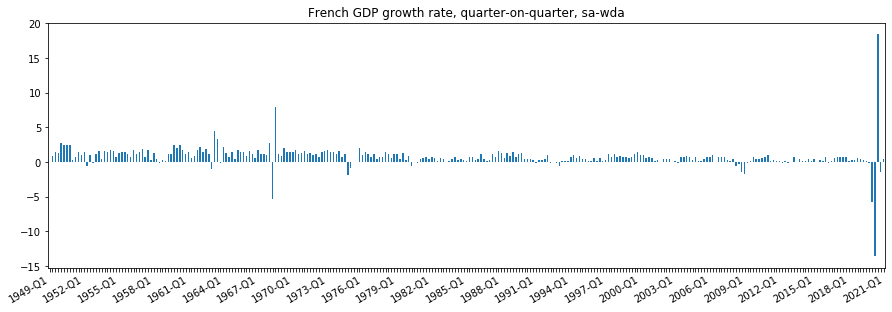

In [1]:
from pynsee.macrodata import * 

import pandas as pd
import matplotlib.ticker as ticker
#%matplotlib inline
import matplotlib.pyplot as plt

# Subscribe to api.insee.fr and get your credentials!
# Beware : any change to the keys should be tested after having cleared the cache
# Please do : from pynsee.utils import *; clear_all_cache()
# Advice : add the following lines to 'pynsee_api_credentials.py' file in your HOME directory
# to avoid running them manually
import os
os.environ['insee_key'] = "my_key"
os.environ['insee_secret'] = "my_secret_key"

# get series key (idbank), for Gross domestic product balance
id = get_series_list("CNT-2014-PIB-EQB-RF")

id = id.loc[(id.FREQ == "T") &
            (id.OPERATION == "PIB") &
            (id.NATURE == "TAUX") &
            (id.CORRECTION == "CVS-CJO")]

data = get_series(id.IDBANK)
data = split_title(df = data, n_split=2)

# define plot
ax = data.plot(kind='bar', x="TIME_PERIOD", stacked=True, y="OBS_VALUE", figsize=(15,5))
#add title
plt.title("French GDP growth rate, quarter-on-quarter, sa-wda")
# customize x-axis tickers
ticklabels = ['']*len(data.TIME_PERIOD)
ticklabels[::12] = [item for item in data.TIME_PERIOD[::12]]
ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
plt.gcf().autofmt_xdate()
#remove legend
ax.get_legend().remove()
#remove x-axistitle
ax.xaxis.label.set_visible(False)
plt.show()